## 回帰係数のグラフ化

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("reg.csv")
reg = LinearRegression()
reg.fit(df[["x"]], df["y"])
print('{0:.2f}'.format(reg.coef_[0]))
print('{0:.2f}'.format(reg.intercept_))

回帰係数（傾き）: [2.]
切片（y軸との交点）: 0.0


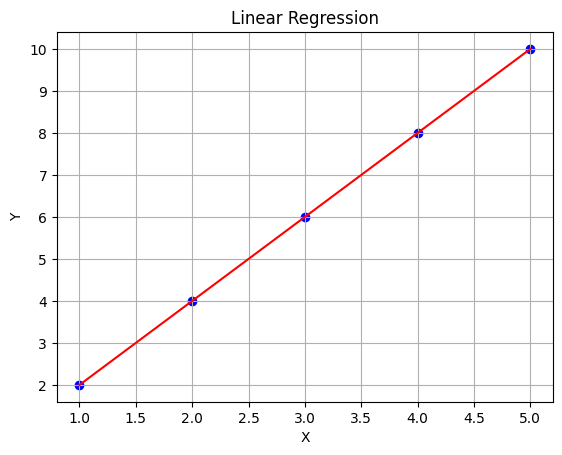

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 例: データ準備（これはあなたの状況に応じて差し替えてください）
array_x = np.array([1, 2, 3, 4, 5])   # 説明変数
array_y = np.array([2, 4, 6, 8, 10])  # 目的変数
n = len(array_x)

# reshapeして2次元配列に変換（scikit-learnは2Dを要求）
arr2d_X = array_x.reshape(n, 1)

# 線形回帰モデルを作成・学習
reg = LinearRegression()
reg.fit(arr2d_X, array_y)

# 回帰係数と切片を表示
print("回帰係数（傾き）:", reg.coef_)
print("切片（y軸との交点）:", reg.intercept_)

x_line = np.array([[min(array_x)], [max(array_x)]])
y_line = reg.predict(x_line)

plt.scatter(array_x, array_y, color='blue')   # 散布図
plt.plot(x_line, y_line, color='red')         # 回帰直線
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## 単回帰・重回帰

In [23]:
# colabに含まれていないライブラリをインストール(接続する度に必要な点に注意
!pip install japanize_matplotlib | tail -n 1
#ライブラリのインポート
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

In [24]:
#cell 課題2-01

#load_dataset関数を使用して、"diamonds"のデータを呼び出し
#呼び出したデータは「df_diamonds」という名前の変数に格納
#データを格納した変数にhead関数を使用して確認
df_diamonds = sns.load_dataset("diamonds")
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
#cell 課題2-02
#欠損値の有無を確認
df_diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [26]:
#cell 課題2-03
#基本統計量でデータの特徴を確認
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
#cell 課題2-04
#相関
df_diamonds.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


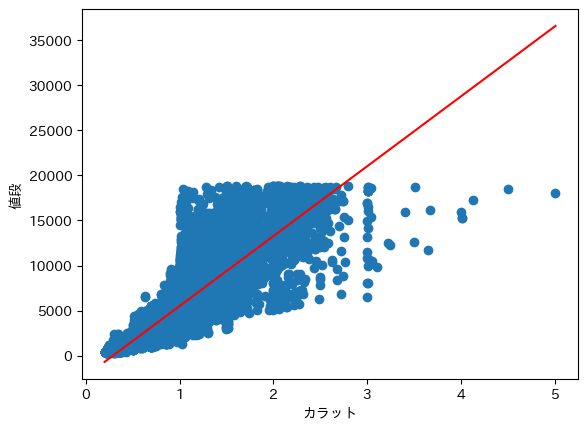

In [30]:
#cell 課題2-05
#散布図でカラットと値段の関係を可視化
plt.scatter(x = df_diamonds["carat"],y = df_diamonds["price"])
plt.xlabel("カラット")
plt.ylabel("値段")

tip_fit = np.polyfit(df_diamonds["carat"], df_diamonds["price"],deg = 1)
tip_1d =  np.poly1d(tip_fit)
x_value = [min(df_diamonds["carat"]),max(df_diamonds["carat"])]
y_value = tip_1d(x_value)

plt.plot(x_value, y_value, color = "red")

In [ ]:
#cell 課題2-06
#単回帰分析：目的変数_値段, 説明変数_カラット
m_formula = "price ~ carat"

reg_multi1 = smf.ols(m_formula, df_diamonds).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        07:01:18   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.0

###目的変数price、説明変数（質的）cutとしダミー変数（cut）を使用した回帰を考える

In [ ]:
#cell 課題2-07
#head関数で変数名を確認
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#cell 課題2-8
#cutカテゴリごとの変数の確認
df_diamonds.groupby('cut').describe().T

<ipython-input-38-c331e4e6c875>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds.groupby('cut').describe().T


cut                 Ideal       Premium     Very Good          Good  \
carat count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean       0.702837      0.891955      0.806381      0.849185   
      std        0.432876      0.515262      0.459435      0.454054   
      min        0.200000      0.200000      0.200000      0.230000   
      25%        0.350000      0.410000      0.410000      0.500000   
      50%        0.540000      0.860000      0.710000      0.820000   
      75%        1.010000      1.200000      1.020000      1.010000   
      max        3.500000      4.010000      4.000000      3.010000   
depth count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean      61.709401     61.264673     61.818275     62.365879   
      std        0.718539      1.158815      1.378631      2.169374   
      min       43.000000     58.000000     56.800000     54.300000   
      25%       61.300000     60.500000     60.900000     61.300000   
      50%       61.800000     61.400000     62.100000     63.400000   
      75%       62.200000     62.200000     62.900000     63.800000   
      max       66.700000     63.000000     64.900000     67.000000   
table count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean      55.951668     58.746095     57.956150     58.694639   
      std        1.246423      1.478573      2.121448      2.851300   
      min       43.000000     51.000000     44.000000     51.000000   
      25%       55.000000     58.000000     56.000000     56.000000   
      50%       56.000000     59.000000     58.000000     58.000000   
      75%       57.000000     60.000000     59.000000     61.000000   
      max       63.000000     62.000000     66.000000     66.000000   
price count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean    3457.541970   4584.257704   3981.759891   3928.864452   
      std     3808.401172   4349.204961   3935.862161   3681.589584   
      min      326.000000    326.000000    336.000000    327.000000   
      25%      878.000000   1046.000000    912.000000   1145.000000   
      50%     1810.000000   3185.000000   2648.000000   3050.500000   
      75%     4678.500000   6296.000000   5372.750000   5028.000000   
      max    18806.000000  18823.000000  18818.000000  18788.000000   
x     count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean       5.507451      5.973887      5.740696      5.838785   
      std        1.064210      1.188252      1.100839      1.057301   
      min        0.000000      0.000000      0.000000      0.000000   
      25%        4.540000      4.800000      4.750000      5.020000   
      50%        5.250000      6.110000      5.740000      5.980000   
      75%        6.440000      6.800000      6.470000      6.420000   
      max        9.650000     10.140000     10.010000      9.440000   
y     count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean       5.520080      5.944879      5.770026      5.850744   
      std        1.074495      1.259751      1.102924      1.051535   
      min        0.000000      0.000000      0.000000      0.000000   
      25%        4.550000      4.790000      4.770000      5.020000   
      50%        5.260000      6.060000      5.770000      5.990000   
      75%        6.445000      6.760000      6.510000      6.440000   
      max       31.800000     58.900000      9.940000      9.380000   
z     count  21551.000000  13791.000000  12082.000000   4906.000000   
      mean       3.401448      3.647124      3.559801      3.639507   
      std        0.657648      0.731161      0.730228      0.654893   
      min        0.000000      0.000000      0.000000      0.000000   
      25%        2.800000      2.940000      2.950000      3.070000   
      50%        3.230000      3.720000      3.560000      3.700000   
      75%        3.980000      4.160000      4.020000      4.030000   
      max        6.03000

In [ ]:
#cell 課題2-9
#ダミー変数の作成（cutに対する）
df_diamonds_dmy = pd.get_dummies(df_diamonds[["price","cut"]])


,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,326,True,False,False,False,False
1,326,False,True,False,False,False


In [ ]:
#cell 課題2-10
#ダミー変数の確認
df_diamonds_dmy.head(2)

,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,326,True,False,False,False,False
1,326,False,True,False,False,False


In [ ]:
#cell 課題2-11
#ダミー変数を用いた回帰の実行　（目的変数「price」、説明変数　「cut」にダミー変数を用いる）
#列名に空白が含まれるとformulaの設定時にエラーになるので、列名を空白を含まないように振り直す必要がある
df_diamonds_dmy.columns=["price","cut_Ideal","cut_Premium","cut_VeryGood","cut_Good","cut_Fair"]
# df_diamonds_dmy.head(2)
formula = "price ~ cut_Ideal+cut_Premium+cut_VeryGood+cut_Good+cut_Fair"
reg_apparel = smf.ols(formula, df_diamonds_dmy).fit()
print(reg_apparel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sun, 11 May 2025   Prob (F-statistic):          8.43e-150
Time:                        07:09:11   Log-Likelihood:            -5.2343e+05
No. Observations:               53940   AIC:                         1.047e+06
Df Residuals:                   53935   BIC:                         1.047e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3385.1970 

Text(0, 0.5, 'price')

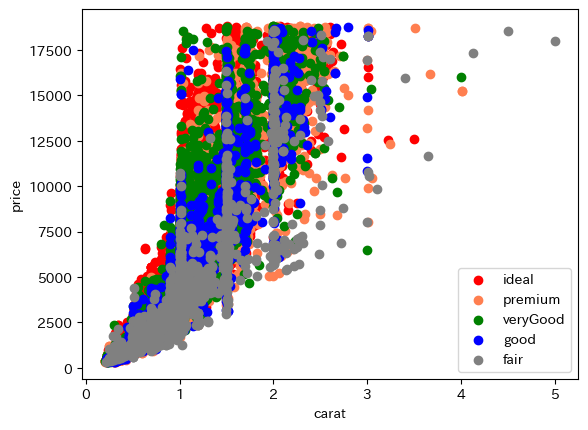

In [ ]:
ideal = df_diamonds[df_diamonds["cut"] == "Ideal"]
premium = df_diamonds[df_diamonds["cut"] == "Premium"]
veryGood = df_diamonds[df_diamonds["cut"] == "Very Good"]
good = df_diamonds[df_diamonds["cut"] == "Good"]
fair = df_diamonds[df_diamonds["cut"] == "Fair"]

#散布図を描く
#色指定はカテゴリごとに変えましょう
#複数の散布図を重ねる
plt.scatter(ideal["carat"], ideal["price"], c = "red")
plt.scatter(premium["carat"], premium["price"], c = "coral")
plt.scatter(veryGood["carat"], veryGood["price"], c = "green")
plt.scatter(good["carat"], good["price"], c = "blue")
plt.scatter(fair["carat"], fair["price"], c = "grey")

#凡例の描画
plt.legend(["ideal","premium", "veryGood", "good", "fair"])
plt.xlabel("carat")
plt.ylabel("price")

## matplotlibに登録されている色名


### おまけmatplotlibに登録されている色名

https://matplotlib.org/2.0.2/examples/color/named_colors.html

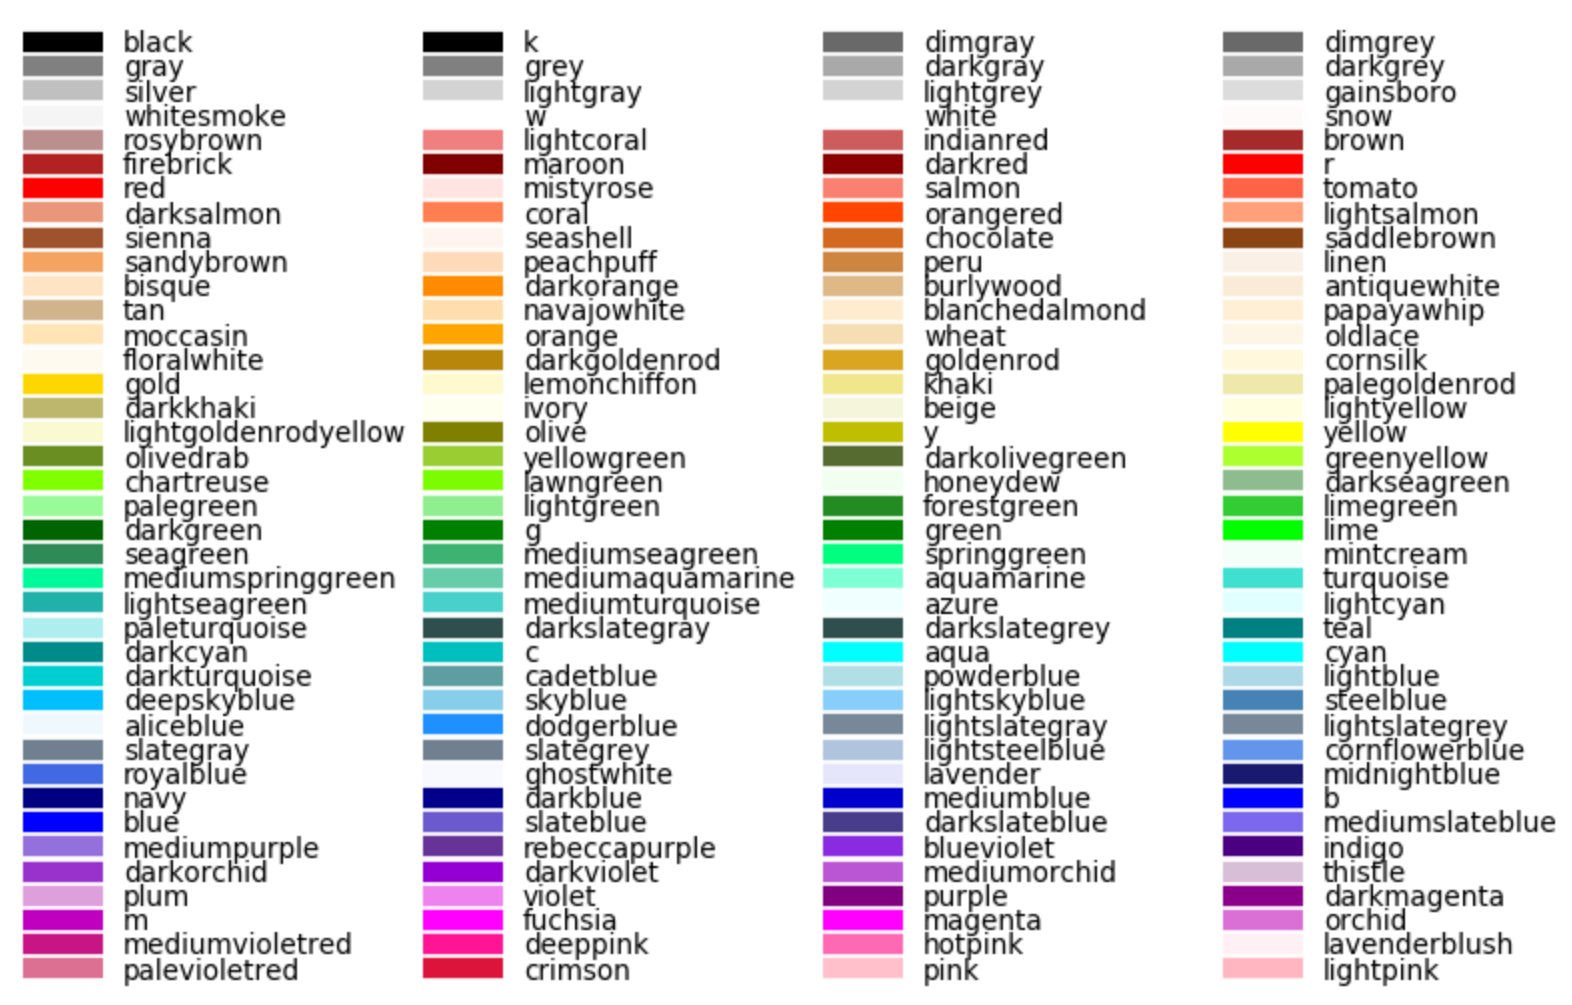

In [ ]:
# カラーコードの取得
import matplotlib
matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3